In [1]:
import time
import numpy as np

import matplotlib.pyplot as plt

In [2]:
from utils.generate_phrases import generate_random_phrase, generate_random_phrase_with_mutation, alphabet

In [19]:
def generate_phrases(phrase, u=0.1, gen_max=1e12):
    for letter in phrase:
        if letter not in alphabet:
            raise ValueError(f"Letter {letter} not in alphabet")
    
    phrase_size = len(phrase)
    gen = 0
    initial_phrase = generate_random_phrase(phrase_size, alphabet)
    new_phrase = initial_phrase
    reached = False
    while True:
        if new_phrase == phrase:
            reached = True

        if new_phrase == phrase or gen >= gen_max:
            break
        new_phrase = generate_random_phrase_with_mutation(initial_phrase, alphabet=alphabet, u=u)
        gen += 1
    return initial_phrase, {"gen": gen, "reached": reached}


In [11]:
phrase = 'GAGCCC'#TCAATCAGGCATACC'
u = 0.01

gens = []
for i in range(5):
    initial_phrase, gen = generate_phrases(phrase, u)
    gens.append(gen)

    print(f"Took {gen.get('gen'):,} generations to generate the phrase '{phrase}' from '{initial_phrase}'")

Took 2,844 generations to generate the phrase 'GAGCCC' from 'ATAAGA'
Took 1,346 generations to generate the phrase 'GAGCCC' from 'ACATTG'
Took 8,951 generations to generate the phrase 'GAGCCC' from 'ACTTCC'
Took 3,149 generations to generate the phrase 'GAGCCC' from 'TGACAC'
Took 6,203 generations to generate the phrase 'GAGCCC' from 'TGGACT'


## Variar o valor de u: 0 a 1, incrementos de 0.001(?)

- Relação entre u e o número médio de gerações necessário para se encontrar o alvo (N médio)
- Há um valor ótimo para u?

## Gráficos

- u por MED(N)
- u port L por MED(N) (Se variar L)

Generating phrases for different mutation rates: 
 [0.0, 0.1, 0.2, 0.30000000000000004, 0.4, 0.5, 0.6000000000000001, 0.7000000000000001, 0.8, 0.9]
Mutation rate: 0.00 | Mean generations: 2409.20 | Time taken: 0.04s
Mutation rate: 0.10 | Mean generations: 5190.60 | Time taken: 0.07s
Mutation rate: 0.20 | Mean generations: 2976.40 | Time taken: 0.03s
Mutation rate: 0.30 | Mean generations: 16349.40 | Time taken: 0.17s
Mutation rate: 0.40 | Mean generations: 34689.80 | Time taken: 0.33s
Mutation rate: 0.50 | Mean generations: 52843.40 | Time taken: 0.46s
Mutation rate: 0.60 | Mean generations: 128125.80 | Time taken: 0.98s
This experiment did not reach the phrase
This experiment did not reach the phrase
Mutation rate: 0.70 | Mean generations: 562861.40 | Time taken: 3.88s
This experiment did not reach the phrase
This experiment did not reach the phrase
Mutation rate: 0.80 | Mean generations: 579031.40 | Time taken: 3.41s
This experiment did not reach the phrase
This experiment did not re

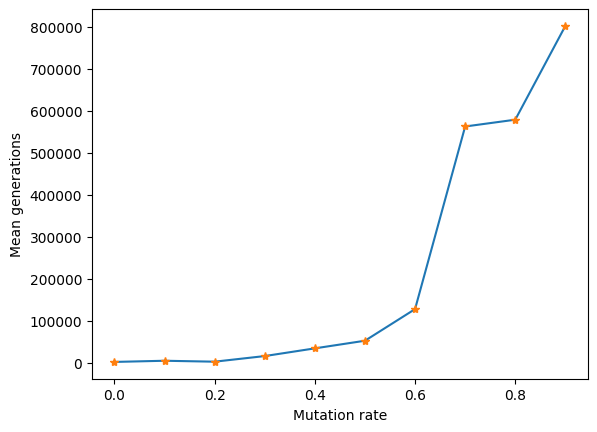

In [20]:
phrase = 'GAGCCC'#TCAATCAGGCATACC'
qntd_exp = 5
step = 0.1
u_list = list(np.arange(0, 1, step))

print("Generating phrases for different mutation rates: \n", u_list)
med_gens = []
t1 = time.time()
for u in u_list:
    gens = []
    t1_epoch = time.time()
    for i in range(qntd_exp):
        initial_phrase, gen = generate_phrases(phrase, u, gen_max=1e6)
        gens.append(gen.get("gen"))
        if not gen.get("reached"):
            print(f"This experiment did not reach the phrase")
    t2_epoch = time.time()
    print(f"Mutation rate: {u:.2f} | Mean generations: {np.mean(gens):.2f} | Time taken: {t2_epoch-t1_epoch:.2f}s")

    med_gens.append(np.mean(gens))
t2 = time.time()
print("Mean generations: ", med_gens)
print("Time taken: ", t2-t1)

plt.plot(u_list, med_gens)
plt.plot(u_list, med_gens, '*')
plt.ylabel("Mean generations")
plt.xlabel("Mutation rate")
plt.show()

Generating phrases for different mutation rates: 
 [0.0, 0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1, 0.11, 0.12, 0.13, 0.14, 0.15, 0.16, 0.17, 0.18, 0.19, 0.2, 0.21, 0.22, 0.23, 0.24, 0.25, 0.26, 0.27, 0.28, 0.29, 0.3, 0.31, 0.32, 0.33, 0.34, 0.35000000000000003, 0.36, 0.37, 0.38, 0.39]
Mutation rate: 0.00 | Mean generations: 5514.60 | Time taken: 0.08s
Mutation rate: 0.01 | Mean generations: 5746.00 | Time taken: 0.07s
Mutation rate: 0.02 | Mean generations: 2576.60 | Time taken: 0.03s
Mutation rate: 0.03 | Mean generations: 5859.20 | Time taken: 0.07s
Mutation rate: 0.04 | Mean generations: 9376.00 | Time taken: 0.12s
Mutation rate: 0.05 | Mean generations: 1410.80 | Time taken: 0.02s
Mutation rate: 0.06 | Mean generations: 1992.60 | Time taken: 0.02s
Mutation rate: 0.07 | Mean generations: 4646.40 | Time taken: 0.06s
Mutation rate: 0.08 | Mean generations: 3297.80 | Time taken: 0.04s
Mutation rate: 0.09 | Mean generations: 3099.00 | Time taken: 0.04s
Mutation rate: 0.

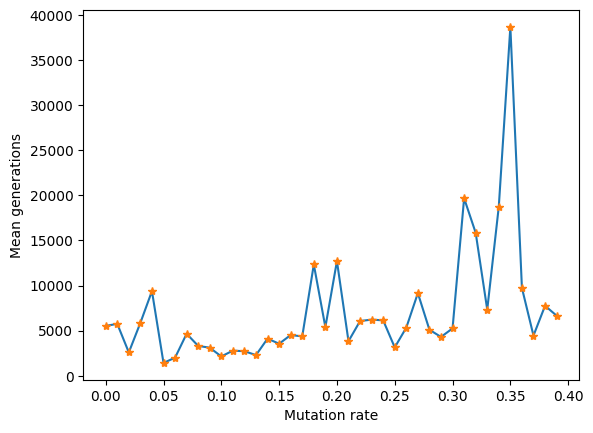

In [21]:
phrase = 'GAGCCC'#TCAATCAGGCATACC'
qntd_exp = 5
step = 0.01
u_list = list(np.arange(0, 0.4, step))

print("Generating phrases for different mutation rates: \n", u_list)
med_gens = []
t1 = time.time()
for u in u_list:
    gens = []
    t1_epoch = time.time()
    for i in range(qntd_exp):
        initial_phrase, gen = generate_phrases(phrase, u, gen_max=1e7)
        gens.append(gen.get("gen"))
        if not gen.get("reached"):
            print(f"This experiment did not reach the phrase")
    t2_epoch = time.time()
    print(f"Mutation rate: {u:.2f} | Mean generations: {np.mean(gens):.2f} | Time taken: {t2_epoch-t1_epoch:.2f}s")

    med_gens.append(np.mean(gens))
t2 = time.time()
print("Mean generations: ", med_gens)
print("Time taken: ", t2-t1)

plt.plot(u_list, med_gens)
plt.plot(u_list, med_gens, '*')
plt.ylabel("Mean generations")
plt.xlabel("Mutation rate")
plt.show()

Generating phrases for different mutation rates: 
 [0.0, 0.001, 0.002, 0.003, 0.004, 0.005, 0.006, 0.007, 0.008, 0.009000000000000001, 0.01, 0.011, 0.012, 0.013000000000000001, 0.014, 0.015, 0.016, 0.017, 0.018000000000000002, 0.019, 0.02, 0.021, 0.022, 0.023, 0.024, 0.025, 0.026000000000000002, 0.027, 0.028, 0.029, 0.03, 0.031, 0.032, 0.033, 0.034, 0.035, 0.036000000000000004, 0.037, 0.038, 0.039, 0.04, 0.041, 0.042, 0.043000000000000003, 0.044, 0.045, 0.046, 0.047, 0.048, 0.049, 0.05, 0.051000000000000004, 0.052000000000000005, 0.053, 0.054, 0.055, 0.056, 0.057, 0.058, 0.059000000000000004, 0.06, 0.061, 0.062, 0.063, 0.064, 0.065, 0.066, 0.067, 0.068, 0.069, 0.07, 0.07100000000000001, 0.07200000000000001, 0.073, 0.074, 0.075, 0.076, 0.077, 0.078, 0.079, 0.08, 0.081, 0.082, 0.083, 0.084, 0.085, 0.08600000000000001, 0.08700000000000001, 0.088, 0.089, 0.09, 0.091, 0.092, 0.093, 0.094, 0.095, 0.096, 0.097, 0.098, 0.099, 0.1, 0.101, 0.10200000000000001, 0.10300000000000001, 0.104000000000

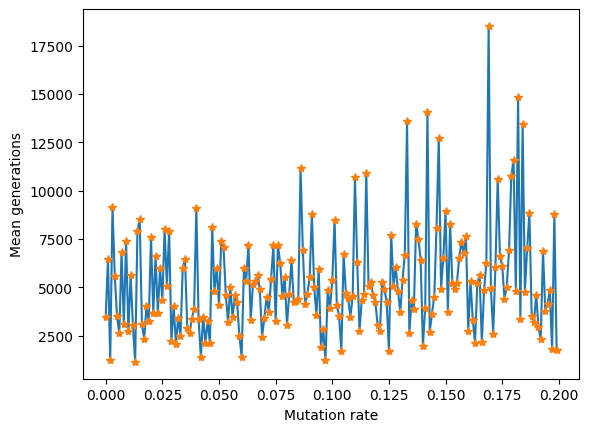

In [18]:
phrase = 'GAGCCC'#TCAATCAGGCATACC'
qntd_exp = 5
step = 0.001
u_list = list(np.arange(0, 0.2, step))

print("Generating phrases for different mutation rates: \n", u_list)
med_gens = []
t1 = time.time()
for u in u_list:
    gens = []
    t1_epoch = time.time()
    for i in range(qntd_exp):
        initial_phrase, gen = generate_phrases(phrase, u, gen_max=1e7)
        gens.append(gen.get("gen"))
        if not gen.get("reached"):
            print(f"This experiment did not reach the phrase")
    t2_epoch = time.time()
    print(f"Mutation rate: {u:.2f} | Mean generations: {np.mean(gens):.2f} | Time taken: {t2_epoch-t1_epoch:.2f}s")

    med_gens.append(np.mean(gens))
t2 = time.time()
print("Mean generations: ", med_gens)
print("Time taken: ", t2-t1)

plt.plot(u_list, med_gens)
plt.plot(u_list, med_gens, '*')
plt.ylabel("Mean generations")
plt.xlabel("Mutation rate")
plt.show()